<a href="https://colab.research.google.com/github/ParidhiRathod/SALES-DATA-EDA/blob/main/DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving synthetic_sales_dataset.csv to synthetic_sales_dataset (1).csv


In [ ]:
import pandas as pd
df=pd.read_csv("synthetic_sales_dataset.csv")
print(df.head)

<bound method NDFrame.head of     Sale_ID Product_Name         Category  Quantity  Unit_Price  Discount(%)  \
0     S1000   Smartphone  Office Supplies         7       47563         23.0   
1     S1001       Laptop  Office Supplies         4       31178         16.0   
2     S1002     Keyboard        Wearables         8       11182          9.0   
3     S1003      Monitor      Accessories         5       49648         28.0   
4     S1004      Monitor        Wearables         7        9019          9.0   
..      ...          ...              ...       ...         ...          ...   
995   S1995      Printer        Wearables         8       44639         14.0   
996   S1996        Mouse      Electronics         1       49213         23.0   
997   S1997   Smartwatch      Accessories         9       30234          7.0   
998   S1998     Keyboard      Electronics         7        7552         20.0   
999   S1999       Laptop      Accessories         3        4154         14.0   

    Sales

In [ ]:
print(df.isnull().sum())

Sale_ID            0
Product_Name       0
Category           0
Quantity           0
Unit_Price         0
Discount(%)        4
Salesperson        0
Region             0
Payment_Method     0
Date               0
Total_Amount       0
Discount_Amount    0
Final_Amount       0
dtype: int64


In [ ]:
print(df[df['Discount(%)'].isnull()])

   Sale_ID Product_Name     Category  Quantity  Unit_Price  Discount(%)  \
5    S1005   Headphones    Wearables         3       31980          NaN   
12   S1012       Laptop  Accessories         3       36322          NaN   
15   S1015      Monitor    Wearables         2       35411          NaN   
23   S1023      Monitor  Electronics         1       21889          NaN   

   Salesperson Region Payment_Method      Date  Total_Amount  Discount_Amount  \
5        Frank  North           Cash  06-01-23         95940              0.0   
12       Grace  South    Credit Card  13-01-23        108966              0.0   
15       Grace  North    Credit Card  16-01-23         70822              0.0   
23       Frank  North    Credit Card  24-01-23         21889              0.0   

    Final_Amount  
5        95940.0  
12      108966.0  
15       70822.0  
23       21889.0  


In [ ]:
mean_discount = df['Discount(%)'].mean()
df['Discount(%)'] = df['Discount(%)'].fillna(mean_discount)

In [ ]:
print(df[df['Discount(%)'].isnull()])

Empty DataFrame
Columns: [Sale_ID, Product_Name, Category, Quantity, Unit_Price, Discount(%), Salesperson, Region, Payment_Method, Date, Total_Amount, Discount_Amount, Final_Amount]
Index: []


Text(0.5, 1.0, 'Box Plot of Total Amount')

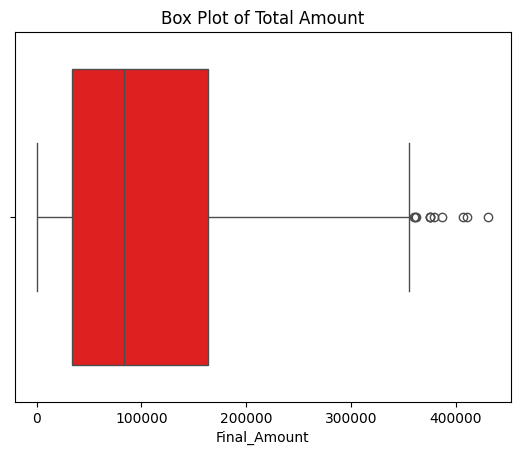

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure()
sn.boxplot(x=(df['Final_Amount']), color="red")
plt.title("Box Plot of Total Amount")

In [ ]:
Q1 = df['Final_Amount'].quantile(0.25)
Q3 = df['Final_Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)
outliers = df[(df['Final_Amount'] < lower_bound) | (df['Final_Amount'] > upper_bound)]

print("Outliers in 'Final_Amount' column:")
display(outliers)


-160390.65
356975.99
Outliers in 'Final_Amount' column:


,Sale_ID,Product_Name,Category,Quantity,Unit_Price,Discount(%),Salesperson,Region,Payment_Method,Date,Total_Amount,Discount_Amount,Final_Amount
62,S1062,Printer,Office Supplies,8,49354,2.0,Eve,South,Debit Card,04-03-23,394832,7896.64,386935.36
85,S1085,Laptop,Wearables,9,40452,1.0,David,South,UPI,27-03-23,364068,3640.68,360427.32
133,S1133,Smartphone,Office Supplies,9,49094,7.0,Grace,South,Cash,14-05-23,441846,30929.22,410916.78
142,S1142,Smartwatch,Electronics,8,47804,2.0,Alice,East,Net Banking,23-05-23,382432,7648.64,374783.36
202,S1202,Monitor,Office Supplies,9,45313,7.0,Eve,East,Net Banking,22-07-23,407817,28547.19,379269.81
303,S1303,Smartphone,Accessories,9,41470,3.0,Eve,West,Net Banking,31-10-23,373230,11196.90,362033.10
359,S1359,Smartwatch,Wearables,9,47042,4.0,Frank,South,Credit Card,26-12-23,423378,16935.12,406442.88
424,S1424,Monitor,Accessories,9,49345,3.0,Charlie,East,Cash,29-02-24,444105,13323.15,430781.85
516,S1516,Camera,Accessories,8,49401,5.0,Charlie,East,Credit Card,31-05-24,395208,19760.40,375447.60
682,S1682,Camera,Accessories,9,46000,13.0,Hannah,East,Net Banking,13-11-24,414000,53820.00,360180.00


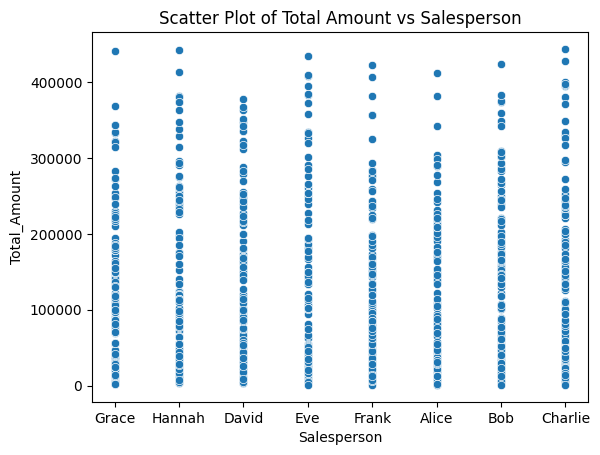

In [ ]:
plt.figure()
sn.scatterplot(x=df['Salesperson'],y=df['Total_Amount'])
plt.title("Scatter Plot of Total Amount vs Salesperson")
plt.show()

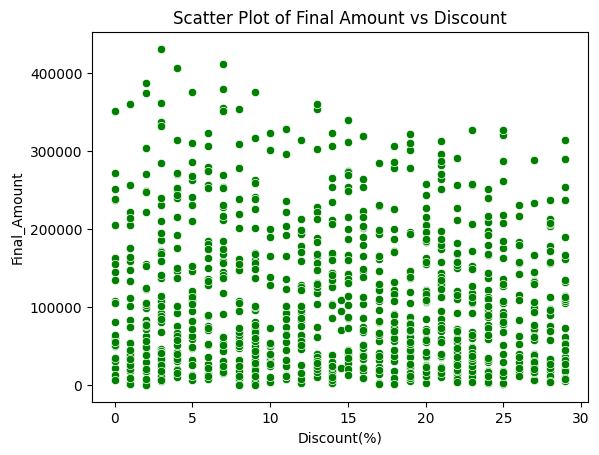

In [ ]:
plt.figure()
sn.scatterplot(x=df['Discount(%)'],y=df['Final_Amount'],color='green')
plt.title("Scatter Plot of Final Amount vs Discount")
plt.show()

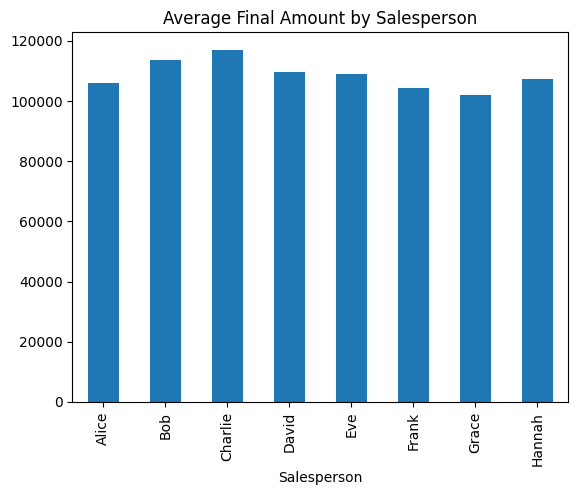

In [ ]:
amount=df.groupby('Salesperson')['Final_Amount'].mean()
amount.plot(kind='bar')
plt.title("Average Final Amount by Salesperson")
plt.xlabel("Salesperson")
# plt.ylabel("Average Final Amount")
plt.show()

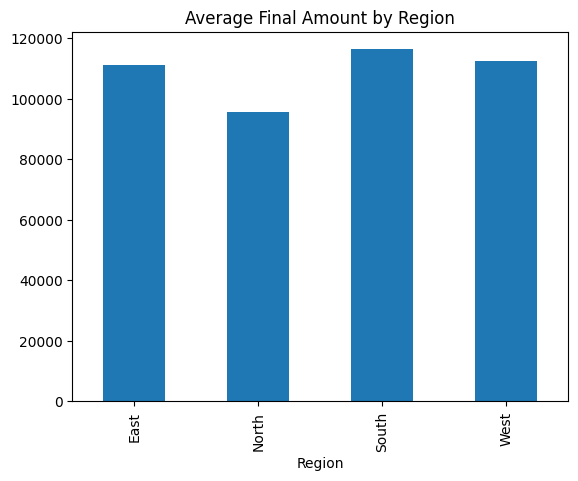

In [ ]:
region=df.groupby('Region')['Final_Amount'].mean()
region.plot(kind='bar')
plt.title("Average Final Amount by Region")
plt.xlabel("Region")
# plt.ylabel("Average Final Amount")
plt.show()


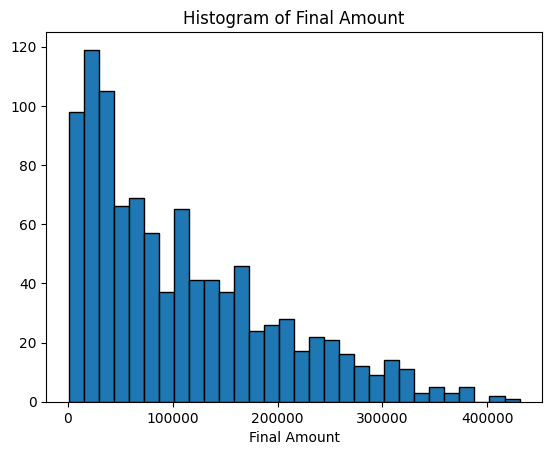

In [ ]:
plt.hist(df['Final_Amount'],bins=30,edgecolor='black')
plt.xlabel("Final Amount")
# plt.ylabel("Frequency")
plt.title("Histogram of Final Amount")
plt.show()

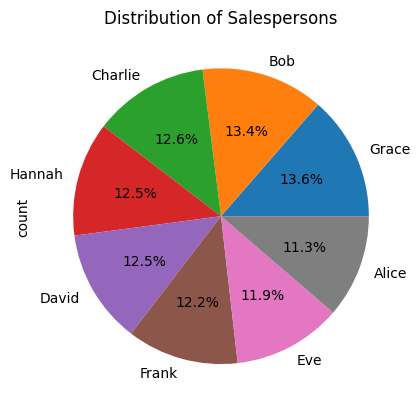

In [ ]:
sp=df['Salesperson'].value_counts()
sp.plot(kind='pie',autopct='%1.1f%%')
plt.title("Distribution of Salespersons")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
df["Final_Amount"] = kmeans.fit_predict(df[["Final_Amount"]])
print("Cluster centers (mean amount):", kmeans.cluster_centers_)




Cluster centers (mean amount): [[188916.24389474]
 [ 30698.72757576]
 [103818.85482014]
 [298271.1523301 ]]
Cluster centers (mean age): [[188916.24389474]
 [ 30698.72757576]
 [103818.85482014]
 [298271.1523301 ]]


In [ ]:
df['cluster_label'] = kmeans.labels_
display(df.head(10))


,Sale_ID,Product_Name,Category,Quantity,Unit_Price,Discount(%),Salesperson,Region,Payment_Method,Date,Total_Amount,Discount_Amount,Final_Amount,cluster_label,Performance_Category
0,S1000,Smartphone,Office Supplies,7,47563,23.0,Grace,West,Cash,01-01-23,332941,76576.43,3,3,High Performance
1,S1001,Laptop,Office Supplies,4,31178,16.0,Hannah,North,UPI,02-01-23,124712,19953.92,2,2,Medium Performance
2,S1002,Keyboard,Wearables,8,11182,9.0,Hannah,East,UPI,03-01-23,89456,8051.04,2,2,Medium-High Performance
3,S1003,Monitor,Accessories,5,49648,28.0,David,East,Debit Card,04-01-23,248240,69507.20,0,0,Medium Performance
4,S1004,Monitor,Wearables,7,9019,9.0,Eve,South,UPI,05-01-23,63133,5681.97,1,1,Medium-High Performance
5,S1005,Headphones,Wearables,3,31980,NaN,Frank,North,Cash,06-01-23,95940,0.00,2,2,Low Performance
6,S1006,Smartphone,Office Supplies,7,20194,3.0,Eve,West,Cash,07-01-23,141358,4240.74,2,2,Medium Performance
7,S1007,Smartwatch,Office Supplies,8,3800,19.0,Alice,West,Cash,08-01-23,30400,5776.00,1,1,Medium-High Performance
8,S1008,Smartphone,Wearables,5,7222,3.0,Bob,South,UPI,09-01-23,36110,1083.30,1,1,Medium-High Performance
9,S1009,Camera,Wearables,4,40486,21.0,David,North,UPI,10-01-23,161944,34008.24,2,2,Medium Performance


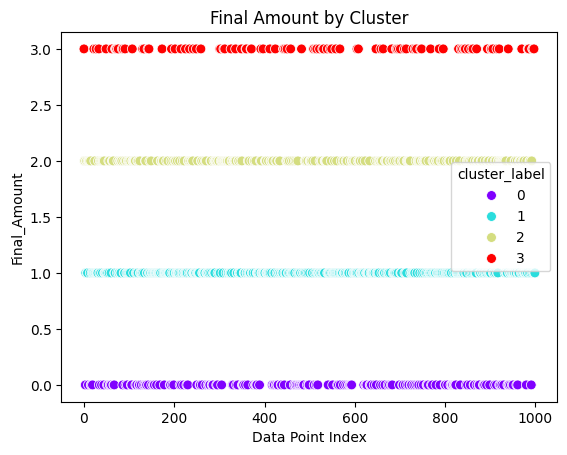

In [ ]:
plt.figure()
sn.scatterplot(data=df, x=df.index, y='Final_Amount', hue='cluster_label',palette="rainbow", s=50)
plt.title('Final Amount by Cluster')
plt.xlabel('Data Point Index')
# plt.ylabel('Final Amount')
plt.show()

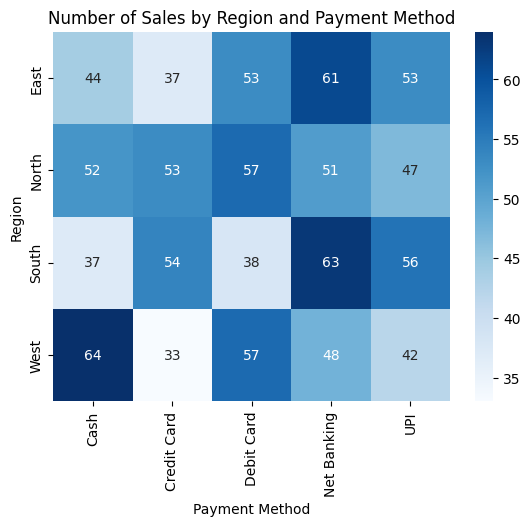

In [ ]:
payment_region_counts = df.groupby(['Region', 'Payment_Method']).size().unstack(fill_value=0)

plt.figure()
sn.heatmap(payment_region_counts, annot=True, fmt='d', cmap='Blues')
plt.title('Number of Sales by Region and Payment Method')
plt.xlabel('Payment Method')
#plt.ylabel('Region')
plt.show()